<a href="https://colab.research.google.com/github/shahpranshu27/HandsOn_ML/blob/main/GBM_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ross_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/store.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/test.csv')
submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/sample_submission.csv')

In [3]:
ross_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [4]:
store_df

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [5]:
submission_df

Id  Sales
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
41083  41084      0
41084  41085      0
41085  41086      0
41086  41087      0
41087  41088      0

[41088 rows x 2 columns]

In [6]:
test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

## Pre-processing

In [7]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [8]:
merged_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    NaN              NaN               NaN  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN  
...                  ...              ...               ...  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              NaN              NaN               NaN  
1017206              NaN              NaN               NaN  
1017207              NaN              NaN               NaN  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [9]:
merged_test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
...              ...       ...        ...                  ...   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
...                          ...                       ...     ...   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        NaN                       NaN       0   
41086                        NaN                       NaN       0   
41087                        NaN                       NaN       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                  NaN              NaN               NaN  
1                 14.0           2011.0   Jan,Apr,Jul,Oct  
2                  NaN              NaN               NaN  
3                  NaN              NaN               NaN  
4                  NaN              NaN               NaN  
...                ...              ...               ...  
41083             31.0           2013.0   Jan,Apr,Jul,Oct  
41084              NaN              NaN               NaN  
41085              NaN              NaN               NaN  
41086              NaN              NaN               NaN  
41087             22.0           2012.0  Mar,Jun,Sept,Dec  

[41088 rows x 17 columns]

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
merged_df.Date = pd.to_datetime(merged_df.Date)
merged_test_df.Date = pd.to_datetime(merged_test_df.Date)

In [12]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [13]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Exploratory Data Analysis & Visaulization

<Axes: xlabel='Sales', ylabel='Count'>

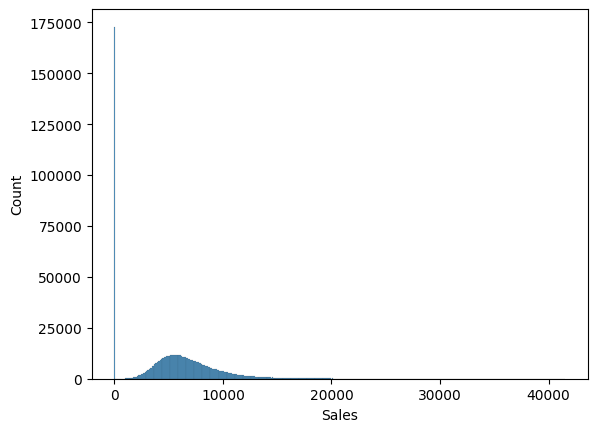

In [14]:
sns.histplot(merged_df.Sales)

In [15]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [16]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [17]:
merged_df.Open.value_counts()

Open
1    844392
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

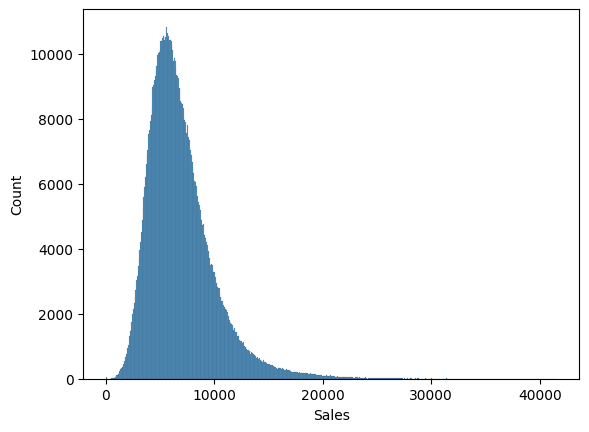

In [18]:
sns.histplot(merged_df.Sales)

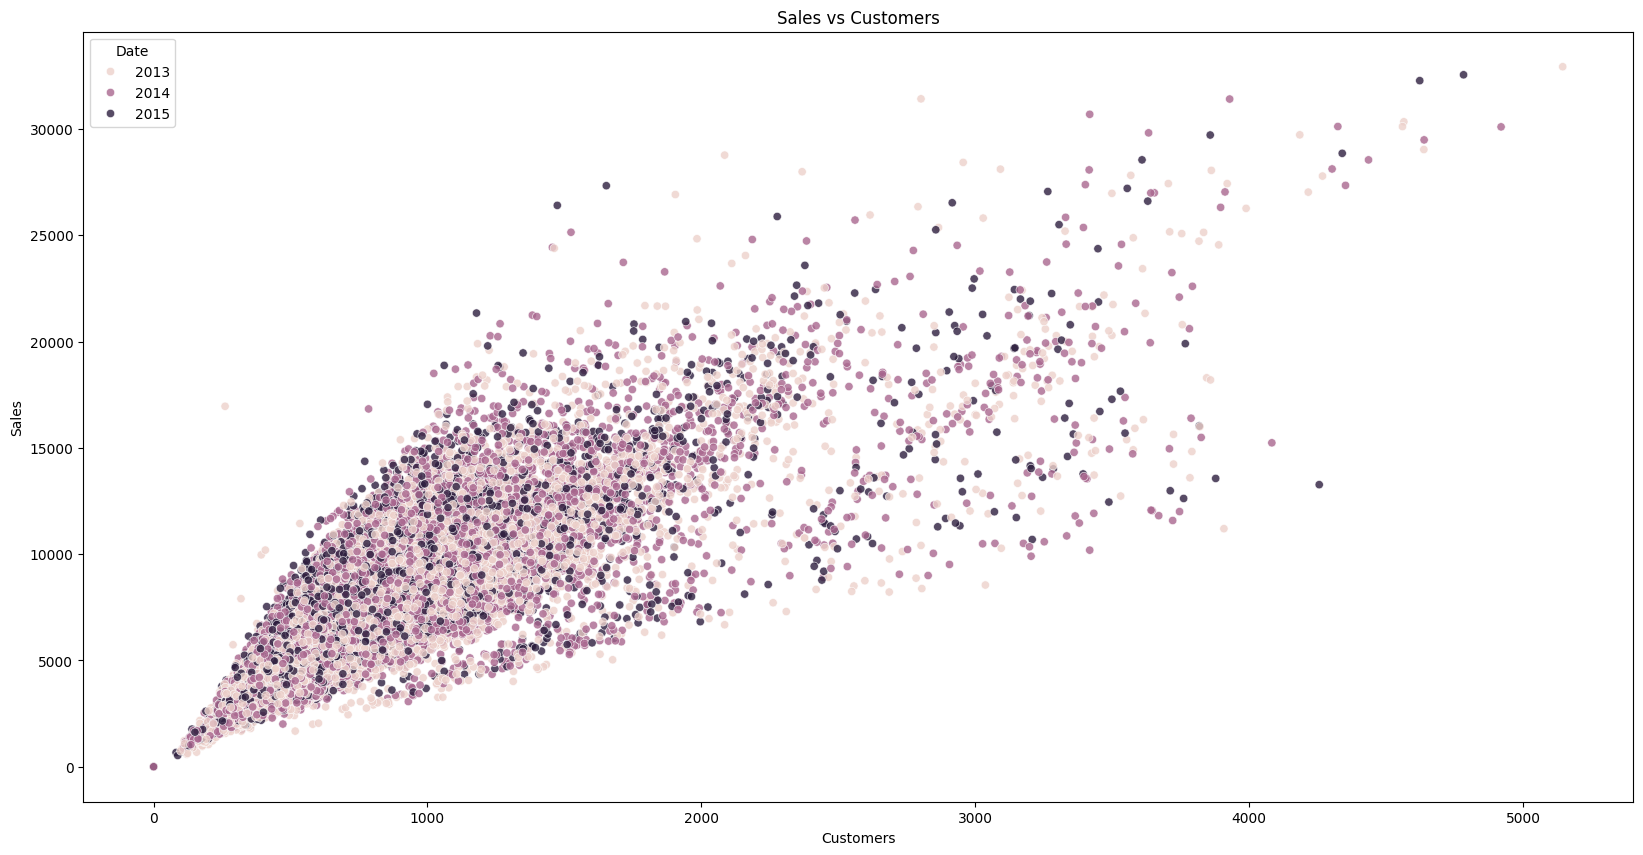

In [19]:
plt.figure(figsize=(20, 10))
temp_df = merged_df.sample(50000)
sns.scatterplot(data=temp_df, x='Customers', y='Sales', hue=temp_df.Date.dt.year, alpha=0.8)
plt.title('Sales vs Customers')
plt.show()

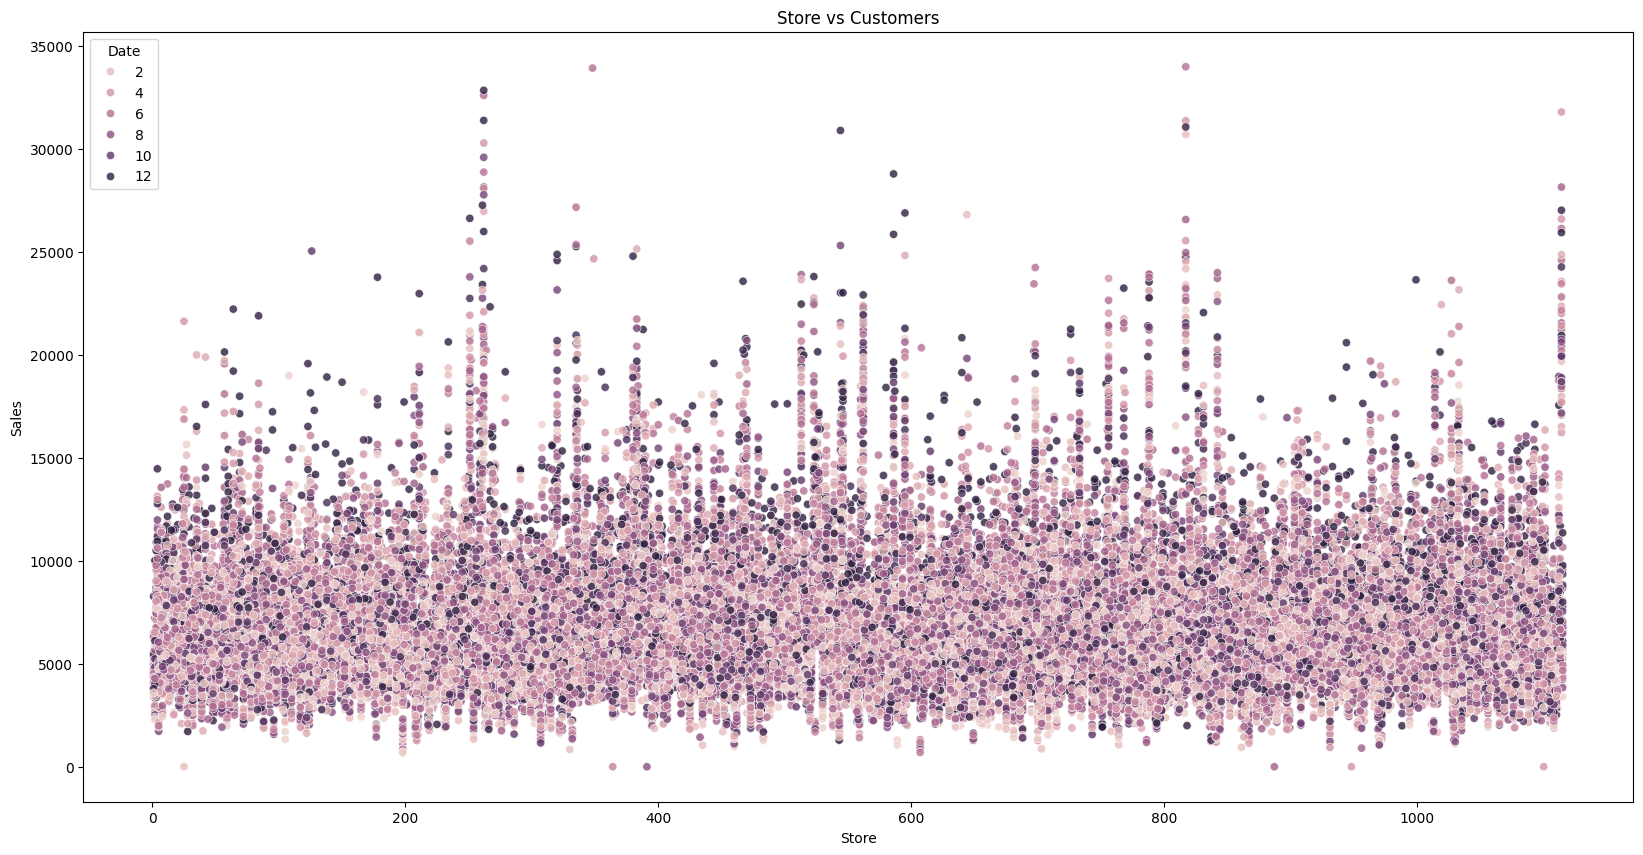

In [20]:
plt.figure(figsize=(20, 10))
temp_df = merged_df.sample(50000)
sns.scatterplot(data=temp_df, x='Store', y='Sales', hue=temp_df.Date.dt.month, alpha=0.8)
plt.title('Store vs Customers')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

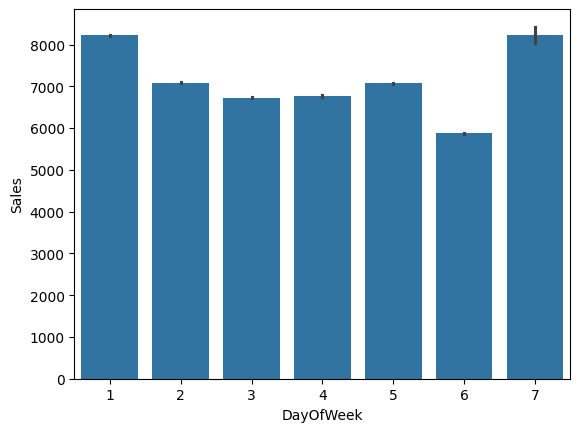

In [21]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

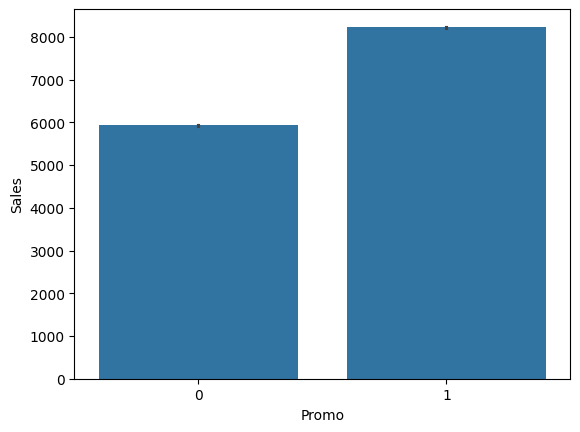

In [22]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

<Axes: xlabel='StateHoliday', ylabel='Sales'>

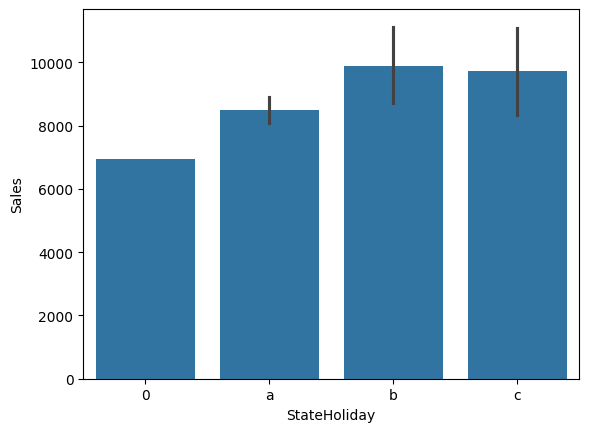

In [23]:
sns.barplot(data=merged_df, x='StateHoliday', y='Sales')

## Pre-processing & Feature Engineering

### Date

In [24]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Day'] = df['Date'].dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [25]:
split_date(merged_df)
split_date(merged_test_df)

In [26]:
merged_df.sample(10)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1001156    672          2 2013-01-15   6477       1174     1      0   
60137     1043          1 2015-06-08   6698        925     1      0   
629875     686          6 2013-12-14   3401        381     1      0   
629        630          5 2015-07-31   7544        801     1      1   
806996     522          1 2013-07-08   6175        544     1      0   
551317     178          6 2014-02-22   6865        727     1      0   
660974     565          6 2013-11-16   4908        667     1      0   
191498     834          2 2015-02-10   4885        609     1      0   
223838     839          1 2015-01-12   7195        834     1      1   
513477     248          5 2014-03-28   7363        989     1      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
1001156            0              0         c  ...                       9.0   
60137              0              0         c  ...                       3.0   
629875             0              0         a  ...                       4.0   
629                0              1         a  ...                       4.0   
806996             0              0         d  ...                      11.0   
551317             0              0         d  ...                       NaN   
660974             0              0         a  ...                       7.0   
191498             0              0         a  ...                       3.0   
223838             0              0         c  ...                       1.0   
513477             0              0         a  ...                       9.0   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
1001156                    2002.0       0              NaN              NaN   
60137                      2006.0       0              NaN              NaN   
629875                     2002.0       0              NaN              NaN   
629                        2015.0       0              NaN              NaN   
806996                     2012.0       1              9.0           2011.0   
551317                        NaN       0              NaN              NaN   
660974                     2007.0       0              NaN              NaN   
191498                     2012.0       0              NaN              NaN   
223838                     2015.0       0              NaN              NaN   
513477                     2012.0       1             40.0           2012.0   

           PromoInterval  Year Month  Day  WeekOfYear  
1001156              NaN  2013     1   15           3  
60137                NaN  2015     6    8          24  
629875               NaN  2013    12   14          50  
629                  NaN  2015     7   31          31  
806996   Jan,Apr,Jul,Oct  2013     7    8          28  
551317               NaN  2014     2   22           8  
660974               NaN  2013    11   16          46  
191498               NaN  2015     2   10           7  
223838               NaN  2015     1   12           3  
513477   Jan,Apr,Jul,Oct  2014     3   28          13  

[10 rows x 22 columns]

In [27]:
merged_test_df.sample(10)

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
7330    7331    625          3 2015-09-09   1.0      0            0   
36590  36591    826          4 2015-08-06   1.0      1            0   
21343  21344   1045          1 2015-08-24   1.0      0            0   
40881  40882    846          6 2015-08-01   1.0      0            0   
21311  21312    998          1 2015-08-24   1.0      0            0   
25502  25503    881          3 2015-08-19   1.0      1            0   
15415  15416     12          7 2015-08-30   0.0      0            0   
2467    2468    977          2 2015-09-15   1.0      1            0   
15193  15194    832          1 2015-08-31   1.0      1            0   
32429  32430    983          2 2015-08-11   1.0      0            0   

       SchoolHoliday StoreType Assortment  ...  CompetitionOpenSinceMonth  \
7330               0         a          a  ...                        4.0   
36590              1         a          c  ...                        6.0   
21343              1         a          c  ...                       12.0   
40881              0         a          c  ...                        4.0   
21311              1         a          a  ...                        9.0   
25502              0         a          a  ...                        3.0   
15415              0         a          c  ...                        NaN   
2467               0         a          a  ...                        9.0   
15193              1         d          a  ...                        NaN   
32429              1         a          a  ...                        3.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
7330                     2011.0       1             22.0           2012.0   
36590                    2005.0       0              NaN              NaN   
21343                    2013.0       0              NaN              NaN   
40881                    2004.0       1             37.0           2009.0   
21311                    2005.0       1              5.0           2013.0   
25502                    2008.0       1             31.0           2013.0   
15415                       NaN       1             13.0           2010.0   
2467                     2005.0       1             13.0           2010.0   
15193                       NaN       1             45.0           2009.0   
32429                    2014.0       1              1.0           2014.0   

         PromoInterval  Year  Month  Day  WeekOfYear  
7330   Feb,May,Aug,Nov  2015      9    9          37  
36590              NaN  2015      8    6          32  
21343              NaN  2015      8   24          35  
40881  Jan,Apr,Jul,Oct  2015      8    1          31  
21311  Feb,May,Aug,Nov  2015      8   24          35  
25502  Feb,May,Aug,Nov  2015      8   19          34  
15415  Jan,Apr,Jul,Oct  2015      8   30          35  
2467   Jan,Apr,Jul,Oct  2015      9   15          38  
15193  Feb,May,Aug,Nov  2015      8   31          36  
32429  Jan,Apr,Jul,Oct  2015      8   11          33  

[10 rows x 21 columns]

### Store open/close

In [28]:
merged_df[merged_df['Open']==0].Sales.value_counts()

Series([], Name: count, dtype: int64)

In [29]:
merged_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0                  0              1         c  ...                       9.0   
1                  0              1         a  ...                      11.0   
2                  0              1         a  ...                      12.0   
3                  0              1         c  ...                       9.0   
4                  0              1         a  ...                       4.0   
...              ...            ...       ...  ...                       ...   
1016776            a              1         b  ...                       9.0   
1016827            a              1         b  ...                      10.0   
1016863            a              1         b  ...                       NaN   
1017042            a              1         b  ...                       NaN   
1017190            a              1         b  ...                       3.0   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                          2008.0       0              NaN              NaN   
1                          2007.0       1             13.0           2010.0   
2                          2006.0       1             14.0           2011.0   
3                          2009.0       0              NaN              NaN   
4                          2015.0       0              NaN              NaN   
...                           ...     ...              ...              ...   
1016776                    2006.0       0              NaN              NaN   
1016827                    1999.0       0              NaN              NaN   
1016863                       NaN       1             48.0           2012.0   
1017042                       NaN       0              NaN              NaN   
1017190                    2002.0       0              NaN              NaN   

           PromoInterval  Year Month  Day  WeekOfYear  
0                    NaN  2015     7   31          31  
1        Jan,Apr,Jul,Oct  2015     7   31          31  
2        Jan,Apr,Jul,Oct  2015     7   31          31  
3                    NaN  2015     7   31          31  
4                    NaN  2015     7   31          31  
...                  ...   ...   ...  ...         ...  
1016776              NaN  2013     1    1           1  
1016827              NaN  2013     1    1           1  
1016863  Jan,Apr,Jul,Oct  2013     1    1           1  
1017042              NaN  2013     1    1           1  
1017190              NaN  2013     1    1           1  

[844392 rows x 22 columns]

### Competition [month/year]

Here, we will calculate the number of months since the competition store is opened.

In [30]:
def comp_open(df):
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x<0 else x).fillna(0)

In [31]:
comp_open(merged_df)
comp_open(merged_test_df)

In [32]:
merged_df.sample(10)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
749784    175          3 2013-08-28   6170        741     1      1   
765633    414          3 2013-08-14   6195        463     1      1   
876467    863          2 2013-05-07   8827       1125     1      0   
819986    132          3 2013-06-26   4093        453     1      0   
986376    387          1 2013-01-28   9070       1381     1      0   
86195     341          5 2015-05-15   6028        853     1      0   
45811      97          6 2015-06-20   4842        438     1      0   
914956    327          2 2013-04-02   7505       1025     1      0   
103627   1048          4 2015-04-30  11320        807     1      1   
566808     59          6 2014-02-08   2586        261     1      0   

       StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceYear  \
749784            0              0         c  ...                      NaN   
765633            0              1         d  ...                      NaN   
876467            0              0         a  ...                   2010.0   
819986            0              0         d  ...                      NaN   
986376            0              0         c  ...                      NaN   
86195             0              0         a  ...                   2011.0   
45811             0              0         d  ...                      NaN   
914956            0              0         c  ...                   2004.0   
103627            0              0         d  ...                   2012.0   
566808            0              0         a  ...                   2007.0   

        Promo2  Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  \
749784       0              NaN              NaN               NaN  2013   
765633       1              1.0           2013.0   Jan,Apr,Jul,Oct  2013   
876467       0              NaN              NaN               NaN  2013   
819986       1             27.0           2012.0   Jan,Apr,Jul,Oct  2013   
986376       1             36.0           2013.0  Mar,Jun,Sept,Dec  2013   
86195        0              NaN              NaN               NaN  2015   
45811        0              NaN              NaN               NaN  2015   
914956       0              NaN              NaN               NaN  2013   
103627       1             40.0           2012.0   Jan,Apr,Jul,Oct  2015   
566808       1             14.0           2011.0   Jan,Apr,Jul,Oct  2014   

        Month Day  WeekOfYear  CompetitionOpen  
749784      8  28          35              0.0  
765633      8  14          33              0.0  
876467      5   7          19             30.0  
819986      6  26          26              0.0  
986376      1  28           5              0.0  
86195       5  15          20             44.0  
45811       6  20          25              0.0  
914956      4   2          14            100.0  
103627      4  30          18             31.0  
566808      2   8           6             80.0  

[10 rows x 23 columns]

### Promotion

In [33]:
# def check_promo_month(row):
#   month2str = {
#       1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
#       7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
#   }

#   try:
#     months = (row['PromoInterval'] or '').split(',')
#     if row['Promo2Open'] and month2str[row['Month']] in months:
#       return 1
#     else:
#       return 0
#   except Exception:
#     return 0

# def promo_cols(df):
#   # Months since Promo2 was Open
#   df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
#   df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

#   # Whether a new round of promotions was started in the current month
#   df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

def promo_cols(df):
    # Months since Promo2 was Open
    df['Promo2Open'] = 12 * (df['Year'] - df['Promo2SinceYear']) +  (df['WeekOfYear'] - df['Promo2SinceWeek']) * 7 / 30.5
    df['Promo2Open'] = df['Promo2Open'].fillna(0)  # Fill NaN values with 0
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x) * df['Promo2']

    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

def check_promo_month(row):
    month2str = {
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    }

    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0


In [34]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [35]:
# merged_df.sample(10)
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)
# if the months from 'PromoInterval' will be the same as the month in the 'Date' column, then it will have 1 in 'IsPromo2Month' column

Date  Promo2  Promo2SinceYear  Promo2SinceWeek  \
945551  2013-03-06       0              NaN              NaN   
785655  2013-07-27       0              NaN              NaN   
590846  2014-01-18       0              NaN              NaN   
69655   2015-05-30       1           2011.0             48.0   
760313  2013-08-19       1           2013.0             31.0   
906825  2013-04-09       0              NaN              NaN   
1000378 2013-01-16       1           2014.0             10.0   
699807  2013-10-12       1           2012.0             22.0   
452804  2014-05-22       1           2014.0             40.0   
742776  2013-09-04       0              NaN              NaN   
566988  2014-02-08       0              NaN              NaN   
923580  2013-03-25       0              NaN              NaN   
766275  2013-08-14       1           2012.0             40.0   
781392  2013-07-31       1           2014.0             10.0   
2308    2015-07-29       0              NaN              NaN   
434547  2014-06-07       1           2010.0             13.0   
702951  2013-10-09       1           2014.0             40.0   
247195  2014-12-20       0              NaN              NaN   
202319  2015-01-31       1           2013.0              5.0   
475069  2014-05-02       0              NaN              NaN   

            PromoInterval  Promo2Open  IsPromo2Month  
945551                NaN    0.000000              0  
785655                NaN    0.000000              0  
590846                NaN    0.000000              0  
69655    Mar,Jun,Sept,Dec   42.032787              0  
760313    Jan,Apr,Jul,Oct    0.688525              0  
906825                NaN    0.000000              0  
1000378   Jan,Apr,Jul,Oct    0.000000              0  
699807    Jan,Apr,Jul,Oct   16.360656              1  
452804    Jan,Apr,Jul,Oct    0.000000              0  
742776                NaN    0.000000              0  
566988                NaN    0.000000              0  
923580                NaN    0.000000              0  
766275    Jan,Apr,Jul,Oct   10.393443              0  
781392    Jan,Apr,Jul,Oct    0.000000              0  
2308                  NaN    0.000000              0  
434547    Jan,Apr,Jul,Oct   50.295082              0  
702951    Jan,Apr,Jul,Oct    0.000000              0  
247195                NaN    0.000000              0  
202319    Feb,May,Aug,Nov   24.000000              0  
475069                NaN    0.000000              0

### Input and Output target columns

In [36]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [37]:
target_col = 'Sales'
input_cols = ['Store', 'DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']

In [38]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [39]:
test_inputs = merged_test_df[input_cols].copy()

In [40]:
numerical_cols = ['Store', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment', 'DayOfWeek']

In [41]:
inputs[numerical_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
Promo2                    0
Year                      0
Month                     0
Day                       0
CompetitionOpen           0
Promo2Open                0
IsPromo2Month             0
dtype: int64

In [42]:
test_inputs[numerical_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
Promo2                  0
Year                    0
Month                   0
Day                     0
CompetitionOpen         0
Promo2Open              0
IsPromo2Month           0
dtype: int64

In [43]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [44]:
inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)

### Scale Numeric Values (in range [0,1])

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler().fit(inputs[numerical_cols])

In [47]:
inputs[numerical_cols] = scaler.transform(inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

### Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [52]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [53]:
X = inputs[numerical_cols+encoded_cols]
X_test = test_inputs[numerical_cols+encoded_cols]

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)

> In simple terms, we are training more trees to correct errors from previous trees.



### Training

To train a GBM, we use `XGBRegressor` from `XGBoost`

In [54]:
from xgboost import XGBRegressor

In [55]:
model = XGBRegressor(n_estimators=20, random_state=42, n_jobs=-1, max_depth=4)

In [56]:
%%time
model.fit(X, targets)

CPU times: user 7.31 s, sys: 346 ms, total: 7.66 s
Wall time: 9.1 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

### Prediction

In [57]:
preds = model.predict(X)
preds

array([8002.9546, 7347.649 , 8376.886 , ..., 7649.0835, 7664.0796,
       9644.286 ], dtype=float32)

### Evaluation

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
def rmse(a,b):
  return mean_squared_error(a, b, squared=False)

In [60]:
rmse(preds, targets)

2364.106695971708

### Visualization

In [61]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 30

<Axes: >

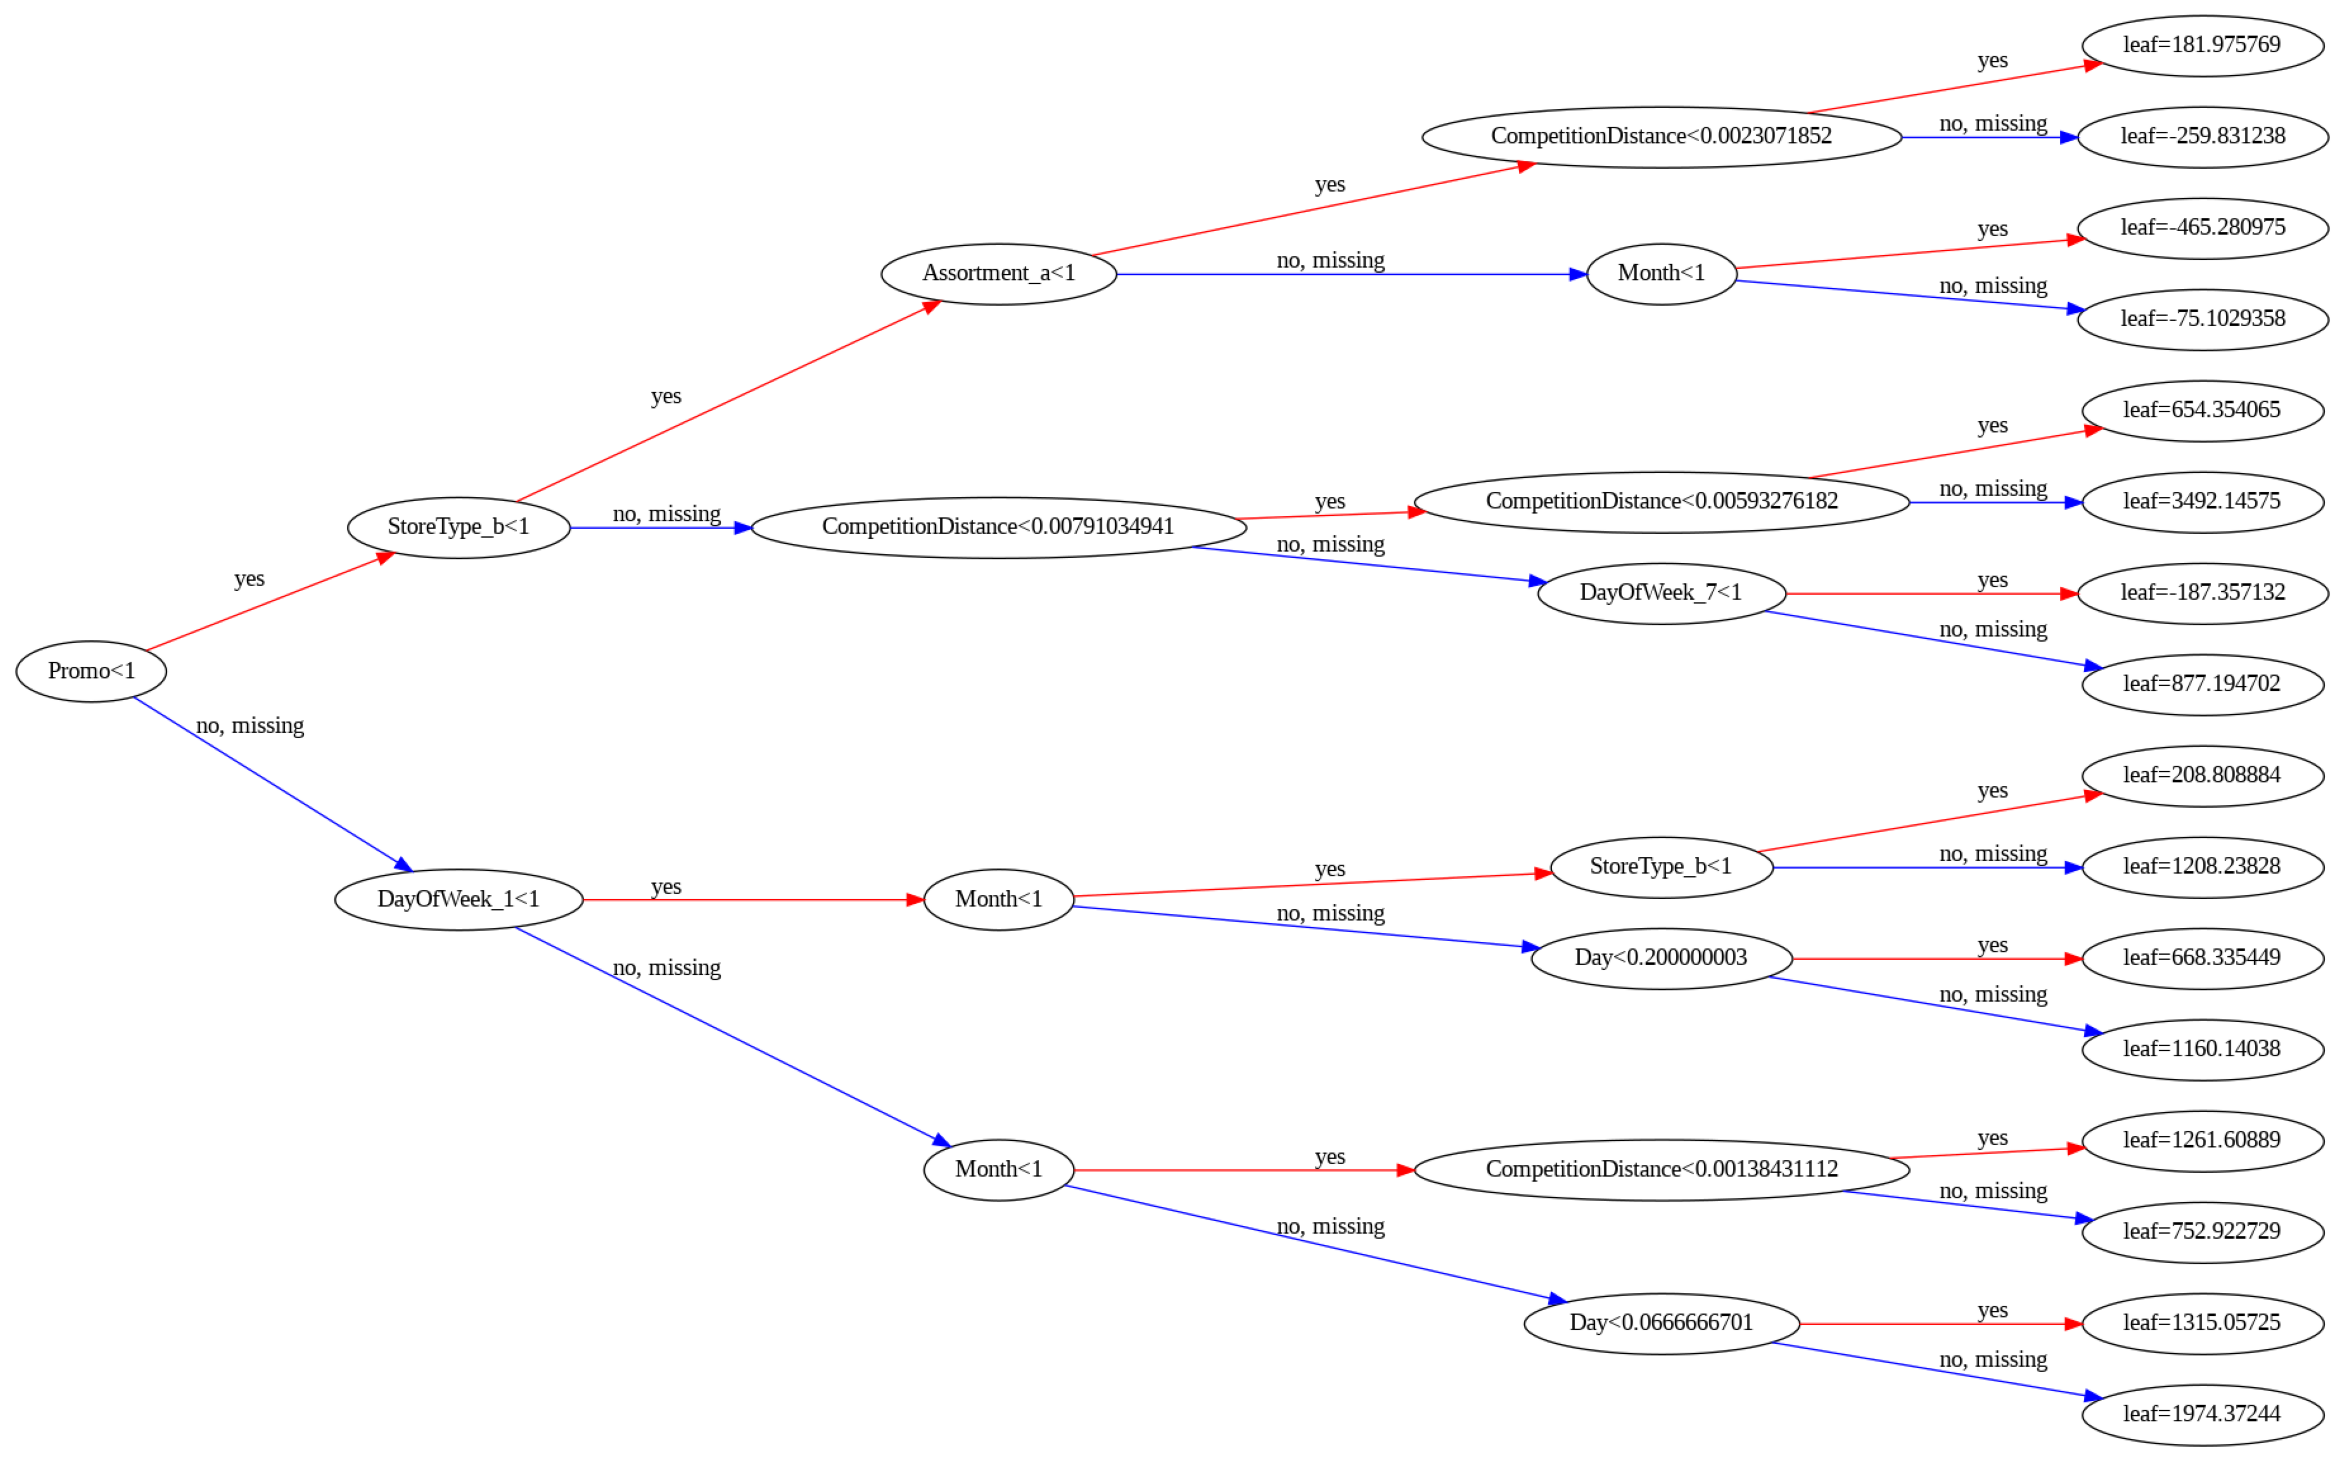

In [62]:
plot_tree(model, rankdir='LR', num_trees=0)

<Axes: >

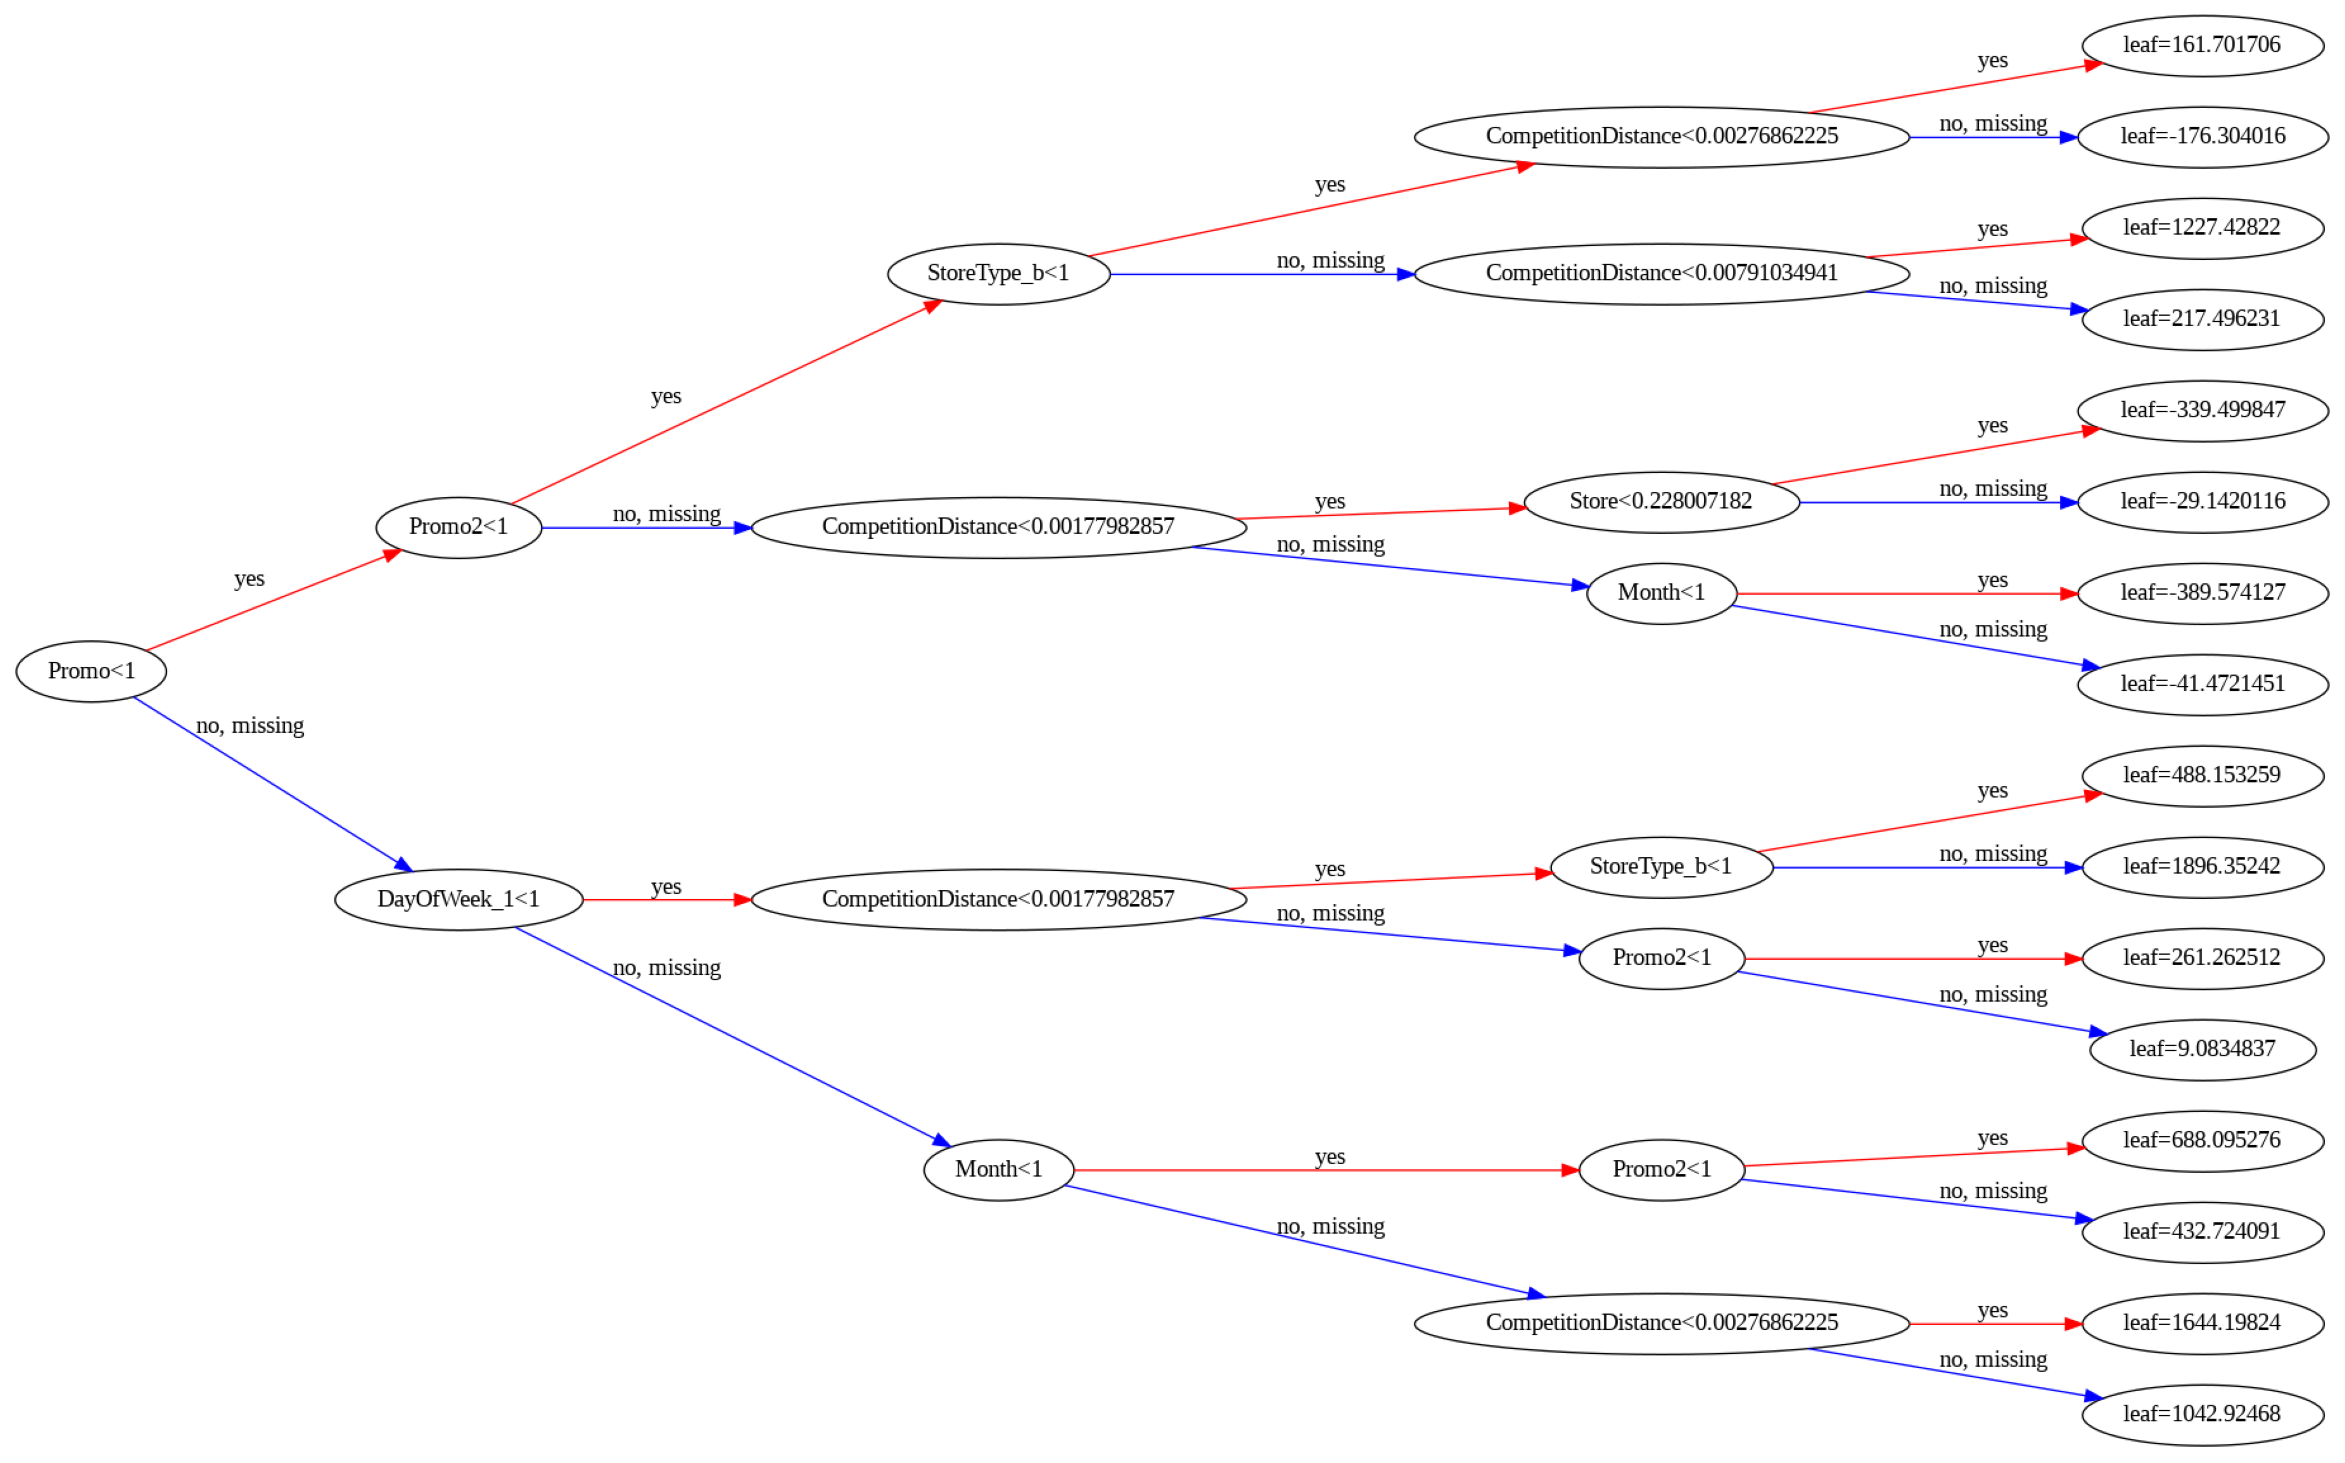

In [63]:
plot_tree(model, rankdir='LR', num_trees=1)

<Axes: >

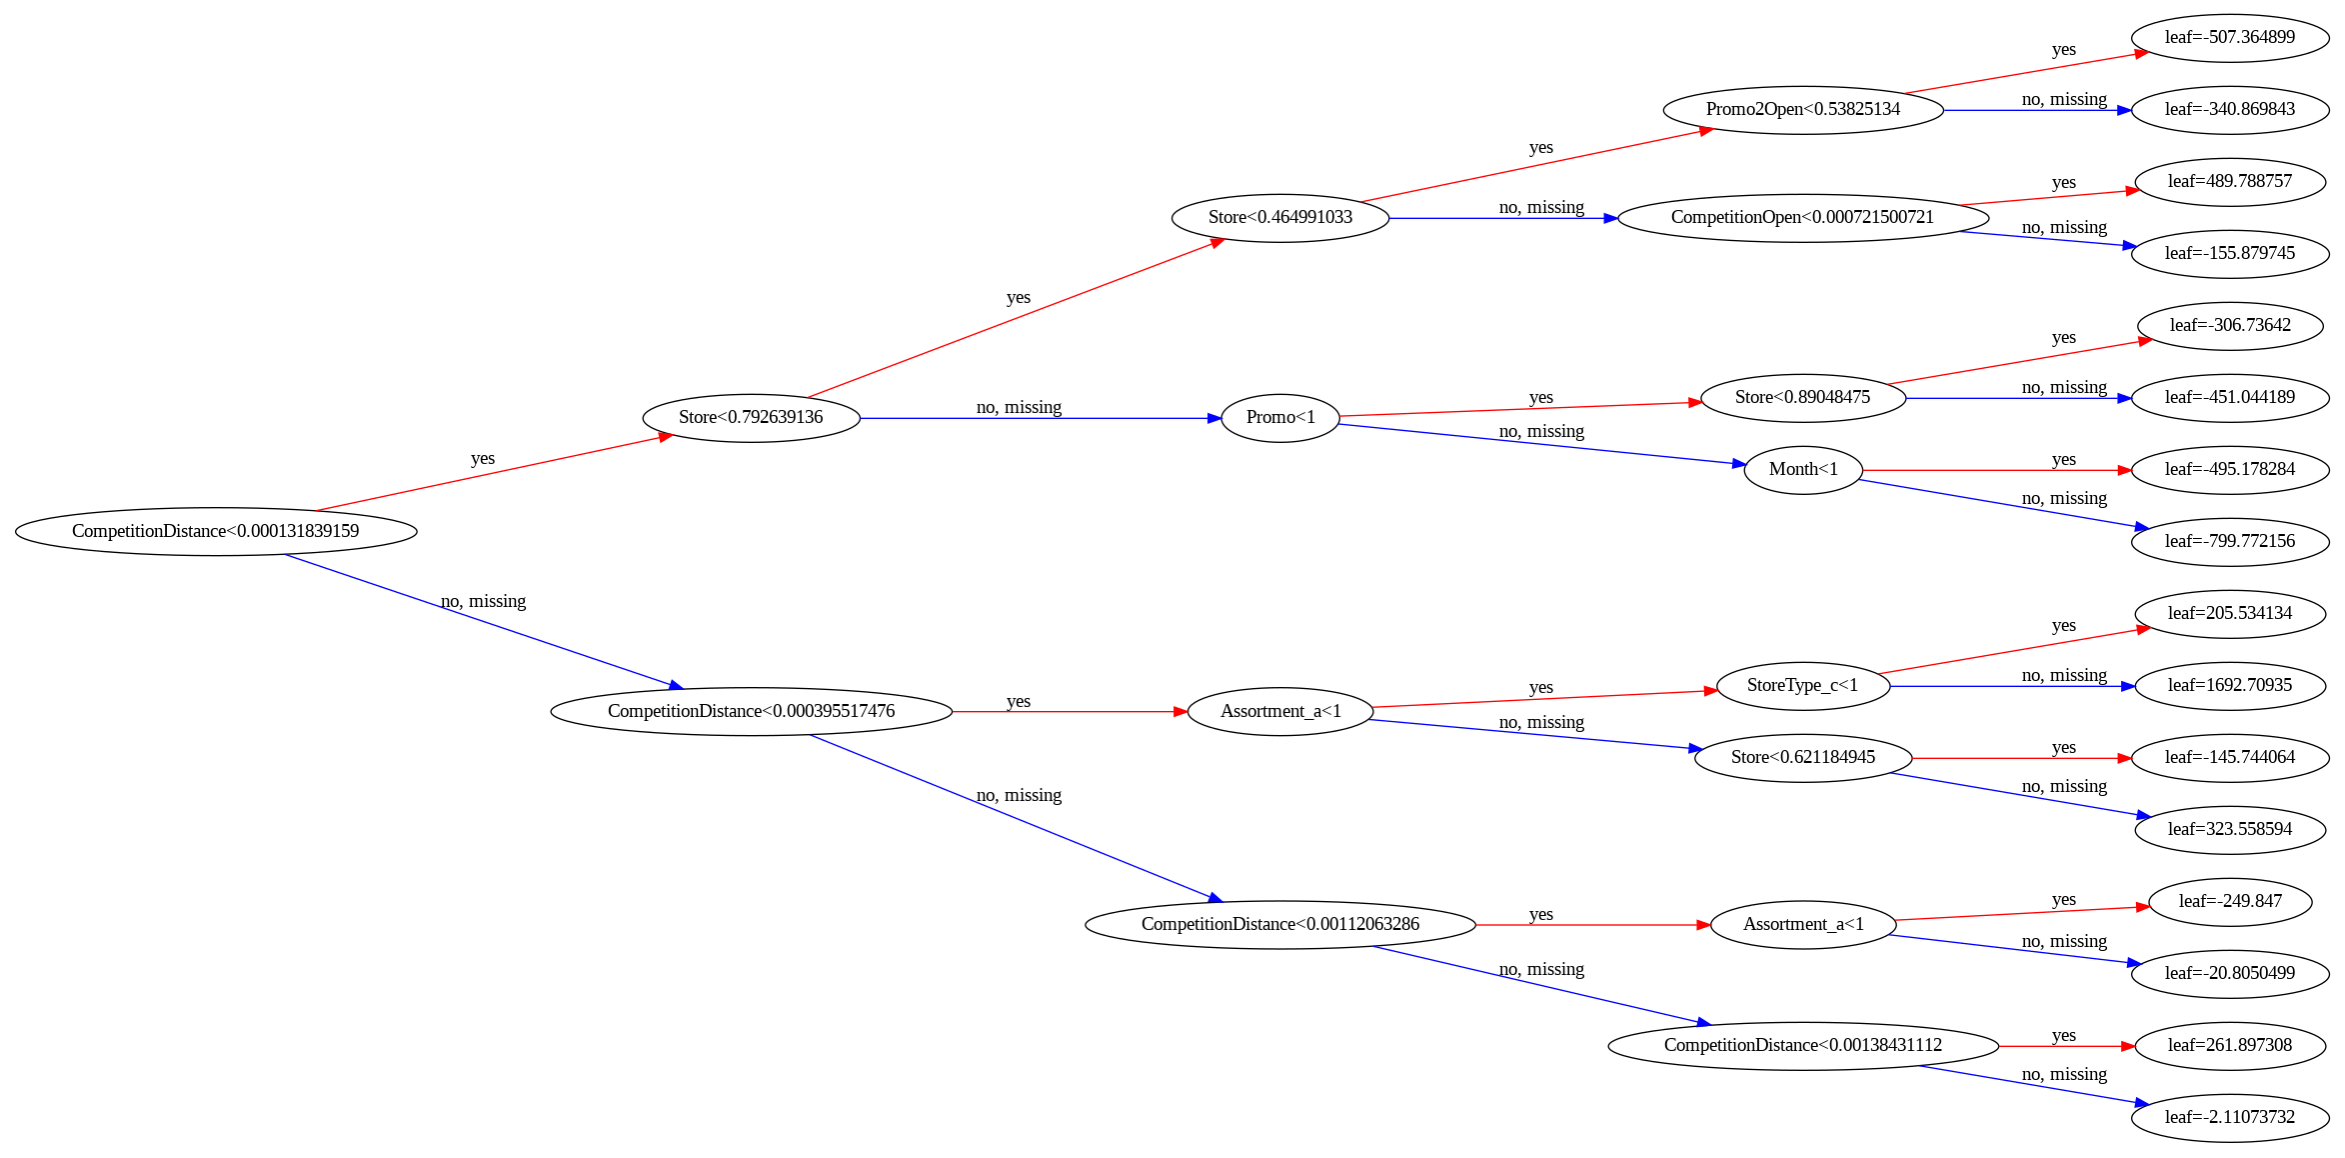

In [64]:
plot_tree(model, rankdir='LR', num_trees=19)

In [65]:
trees = model.get_booster().get_dump()

In [66]:
len(trees)

20

### Feature Importance

In [67]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [68]:
importance_df.head(10)

feature  importance
1                 Promo    0.339391
22          DayOfWeek_1    0.122426
16          StoreType_b    0.069168
4                Promo2    0.049514
3   CompetitionDistance    0.045622
19         Assortment_a    0.041297
8       CompetitionOpen    0.038872
17          StoreType_c    0.037024
2         SchoolHoliday    0.035819
6                 Month    0.029064

<Axes: title={'center': 'Importance vs Feature'}, xlabel='importance', ylabel='feature'>

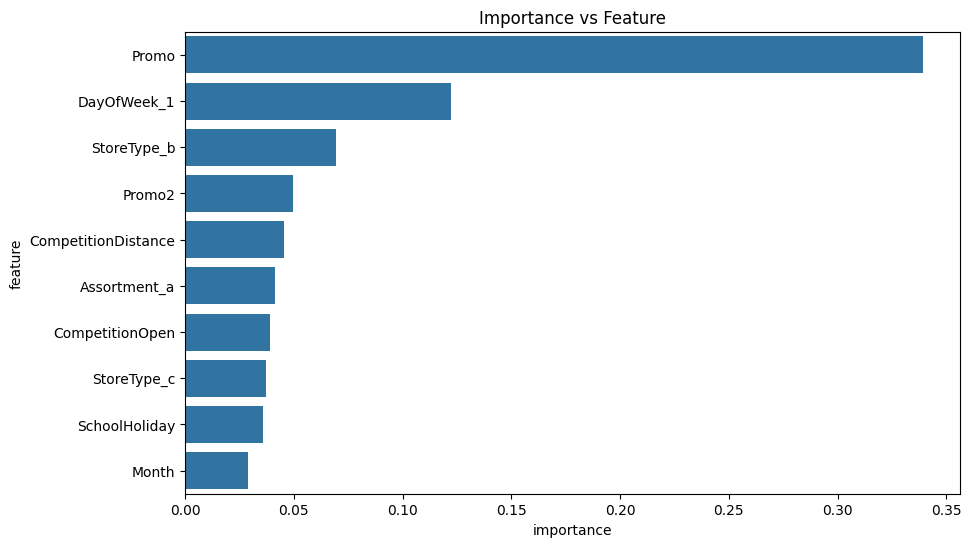

In [71]:
plt.figure(figsize=(10, 6))
plt.title("Importance vs Feature")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## K Fold Cross Validation

In [72]:
from sklearn.model_selection import KFold

In [75]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [76]:
kfold = KFold(n_splits=5)

In [77]:
models = []

for train_index, val_index in kfold.split(X):
  X_train, train_targets = X.iloc[train_index], targets.iloc[train_index]
  X_val, val_targets = X.iloc[val_index], targets.iloc[val_index]

  model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, max_depth=4, n_estimators=20)
  models.append(model)

  print("Train RMSE: {}, Validation RMSE: {} ".format(train_rmse, val_rmse))

Train RMSE: 2361.7752491820993, Validation RMSE: 2422.7755546414483 
Train RMSE: 2404.548895136297, Validation RMSE: 2456.3416637236883 
Train RMSE: 2391.906076465945, Validation RMSE: 2365.5324196031424 
Train RMSE: 2330.5426489872393, Validation RMSE: 2438.7703680441896 
Train RMSE: 2338.9412703591624, Validation RMSE: 2408.6042318193163 


In [78]:
def predict_avg(models, inputs):
  return np.mean([model.predict(inputs) for model in models], axis=0)

In [80]:
preds = predict_avg(models, X)
preds

array([7964.9897, 7651.0103, 8514.868 , ..., 7809.503 , 7465.2407,
       9710.337 ], dtype=float32)

## Hyperparameter Tuning and Regularization